# Web Scraping using Python
Hear we extract data from the web, manipulate and clean data using Python's Pandas library, and data visualize using Python's Matplotlib library.

### Web Scraping using Beautiful Soup

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [31]:
# To open urls
from urllib.request import urlopen
# To extract data
from bs4 import BeautifulSoup 

In [32]:
# storing url in a variable
url = "http://www.hubertiming.com/results/2017GPTR10K"
# pass it to urlopen() to get html page
html = urlopen(url)

In [33]:
# create bs4 object from the html
soup = BeautifulSoup(html,'lxml')
type(soup)

bs4.BeautifulSoup

In [34]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [35]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [36]:
#extracting the hyperlinks
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><im

In [37]:
# using for loop and get("href")method to  extract data and print links only
all_links = soup.find_all('a')
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [38]:
#To print rows out table rows only,pass  the tr argument
rows = soup.find_all('tr')
print(rows[:10])


[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<

#### The goal of this tutorial is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. To get there, you should get all table rows in list form first and then convert that list into a dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows.

In [42]:
#prints out the cells of the rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

###### remove the html tags using Beautiful Soup or regular expressions4

In [43]:
# Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.
str_cells = str(row_td)
clean_txt = BeautifulSoup(str_cells,"lxml").get_text()
print(clean_txt)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row

In [41]:
import re
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    # matches the shortest possible string
    clean = re.compile('<.*?>')
    #find all the substrings where the 
    regular expression matches and replace them with an empty string.
   
    clean2 = (re.sub(clean, '',str_cells))
    
    list_rows.append(clean2)
print(clean2)
type(clean2)   


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


str

In [44]:
#replacing /r/n using replace method
list_rows = [x.replace("\r\n","") for x in list_rows ]
list_rows 

['[]',
 '[Finishers:, 577]',
 '[Male:, 414]',
 '[Female:, 163]',
 '[]',
 '[1, 814,                     JARED WILSON                , M, TIGARD, OR, 36:21, 5:51, 36:24, ]',
 '[2, 573,                     NATHAN A SUSTERSIC                , M, PORTLAND, OR, 36:42, 5:55, 36:45, \n                            INTEL TEAM F                        ]',
 '[3, 687,                     FRANCISCO MAYA                , M, PORTLAND, OR, 37:44, 6:05, 37:48, ]',
 '[4, 623,                     PAUL MORROW                , M, BEAVERTON, OR, 38:34, 6:13, 38:37, ]',
 '[5, 569,                     DEREK G OSBORNE                , M, HILLSBORO, OR, 39:21, 6:20, 39:24, \n                            INTEL TEAM F                        ]',
 '[6, 642,                     JONATHON TRAN                , M, PORTLAND, OR, 39:49, 6:25, 39:55, ]',
 '[7, 144,                     GEORGE TOTONCHY                , M, PORTLAND, OR, 40:04, 6:27, 40:17, ]',
 '[8, 395,                     BENJAMIN C CHAFFIN                , M

In [45]:
list_rows = [x.replace("\n","") for x in list_rows ]
list_rows 

['[]',
 '[Finishers:, 577]',
 '[Male:, 414]',
 '[Female:, 163]',
 '[]',
 '[1, 814,                     JARED WILSON                , M, TIGARD, OR, 36:21, 5:51, 36:24, ]',
 '[2, 573,                     NATHAN A SUSTERSIC                , M, PORTLAND, OR, 36:42, 5:55, 36:45,                             INTEL TEAM F                        ]',
 '[3, 687,                     FRANCISCO MAYA                , M, PORTLAND, OR, 37:44, 6:05, 37:48, ]',
 '[4, 623,                     PAUL MORROW                , M, BEAVERTON, OR, 38:34, 6:13, 38:37, ]',
 '[5, 569,                     DEREK G OSBORNE                , M, HILLSBORO, OR, 39:21, 6:20, 39:24,                             INTEL TEAM F                        ]',
 '[6, 642,                     JONATHON TRAN                , M, PORTLAND, OR, 39:49, 6:25, 39:55, ]',
 '[7, 144,                     GEORGE TOTONCHY                , M, PORTLAND, OR, 40:04, 6:27, 40:17, ]',
 '[8, 395,                     BENJAMIN C CHAFFIN                , M, PO

###### The next step is to convert the list into a dataframe and get a quick view of the first 10 rows using Pandas

In [46]:
df = pd.DataFrame(list_rows)
df[1:10]

,0
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON ..."
6,"[2, 573, NATHAN A SUSTERSI..."
7,"[3, 687, FRANCISCO MAYA ..."
8,"[4, 623, PAUL MORROW ..."
9,"[5, 569, DEREK G OSBORNE ..."


### Data Manipulation and Cleaning

The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.

In [47]:
df1 = df[0].str.split(',',expand = True)
df1 = df1.drop(0)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,[3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...
10,[6,642,JONATHON TRAN ...,M,PORTLAND,OR,39:49,6:25,39:55,]


In [48]:
#using strip method removing ] (brackets)
df1[0]= df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...
10,6,642,JONATHON TRAN ...,M,PORTLAND,OR,39:49,6:25,39:55,]


Adding table headers into the dataset

In [49]:
#using find_all method to get the the table headers
col_labels = soup.find_all('th')

In [50]:
# use Beautiful Soup to extract text in between html tags for table headers
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str,"lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [51]:
 # converting the list of all headers into a pandas dataframe
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [52]:
#splitting the colums using split method
df3 = df2[0].str.split(',', expand = True)
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


The two dataframes can be concatenated into one using the concat() method 

In [53]:
frames = [df3,df1]
df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


assign the first row to be the table header

In [54]:
df5 = df4.rename(columns = df4.iloc[0])
df5.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [55]:
df5.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      582 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.0+ KB


(582, 1)

drop all rows with any missing values.

In [56]:
df6 = df5.dropna(axis=0, how ='any')
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [57]:
# renaming the '[Place' and ' Team]' columns
df7.rename(columns={'[Place':'Place'},inplace=True)

df7.rename(columns={' Team]':'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [58]:
#removing the closing bracket for cells in the "Team" column
df7['Team'] = df7['Team'].str.strip(']')
df7.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...
10,6,642,JONATHON TRAN ...,M,PORTLAND,OR,39:49,6:25,39:55,
11,7,144,GEORGE TOTONCHY ...,M,PORTLAND,OR,40:04,6:27,40:17,
12,8,395,BENJAMIN C CHAFFIN ...,M,PORTLAND,OR,40:05,6:27,40:09,
13,9,7,BRANDON THOMAS ...,M,,,40:17,6:29,40:24,COLUMBIA TEAM B ...
14,10,3,ERIK BJORNSTAD ...,M,,,40:21,6:30,40:25,COLUMBIA TEAM A ...


## Data Analysis and Visualization

 average finish time (in minutes) for the runners?

In [60]:
#convert the column "Chip Time" into just minutes
time_list = df7[' Chip Time'].apply(str)

h = time_list.apply(lambda x: sum([a*b for a,b in zip(list(map(int,x.split(':')))[::-1],[1/60,1,60])]))
h




5       36.350000
6       36.700000
7       37.733333
8       38.566667
9       39.350000
          ...    
577     98.283333
578     98.516667
579     98.533333
580    100.783333
581    101.300000
Name:  Chip Time, Length: 577, dtype: float64

In [61]:
df7['Runner_mins'] = h
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...,36.700000
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,,38.566667
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...,39.350000


In [63]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [73]:
#mport parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

([<matplotlib.axis.XTick at 0x277c97c3c70>], [Text(1, 0, 'Runners')])

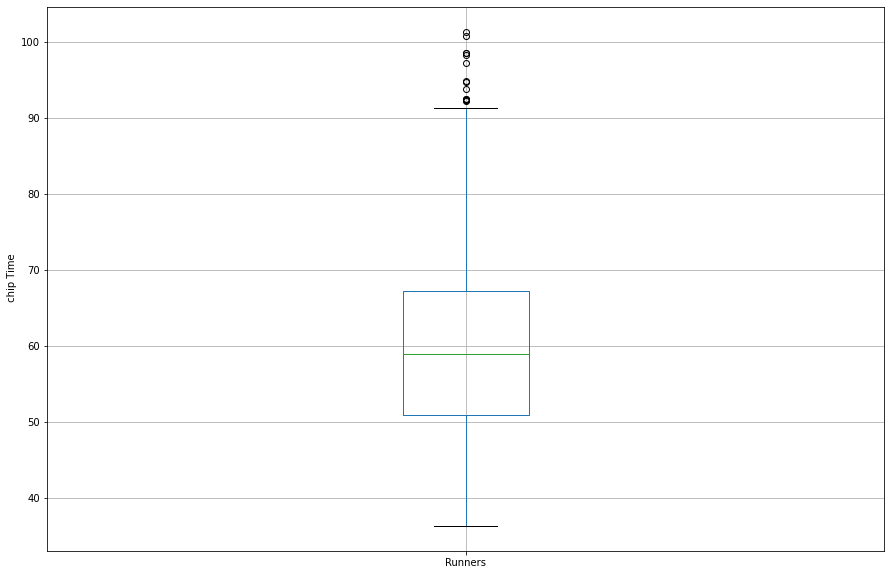

In [75]:
df7.boxplot(column = 'Runner_mins')
plt.grid(True,axis='y')
plt.ylabel(' chip Time')
plt.xticks([1],['Runners'])

Did the runners' finish times follow a normal distribution?

C:\Anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


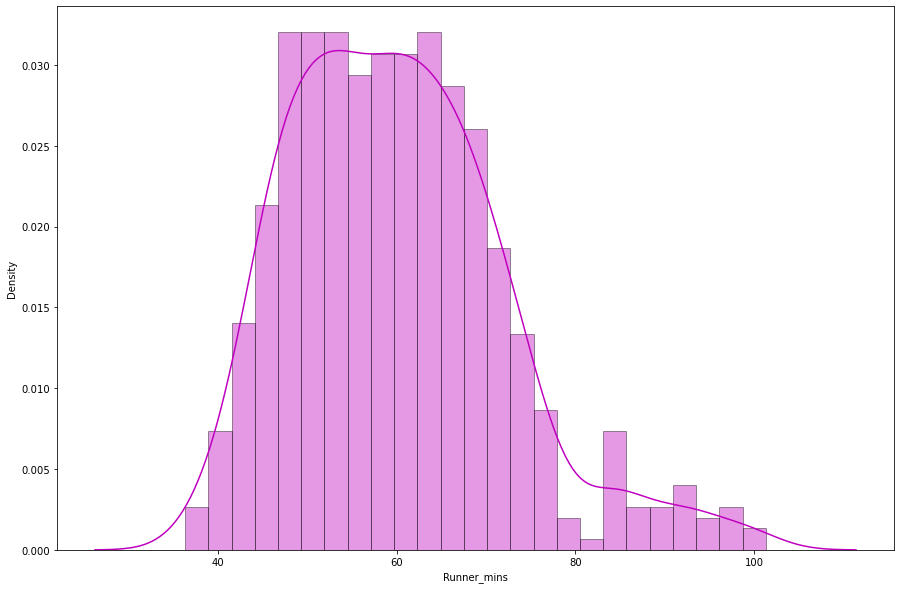

In [82]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

he third question deals with whether there were any performance differences between males and females of various age groups. Below is a distribution plot of chip times for males and females.

C:\Anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


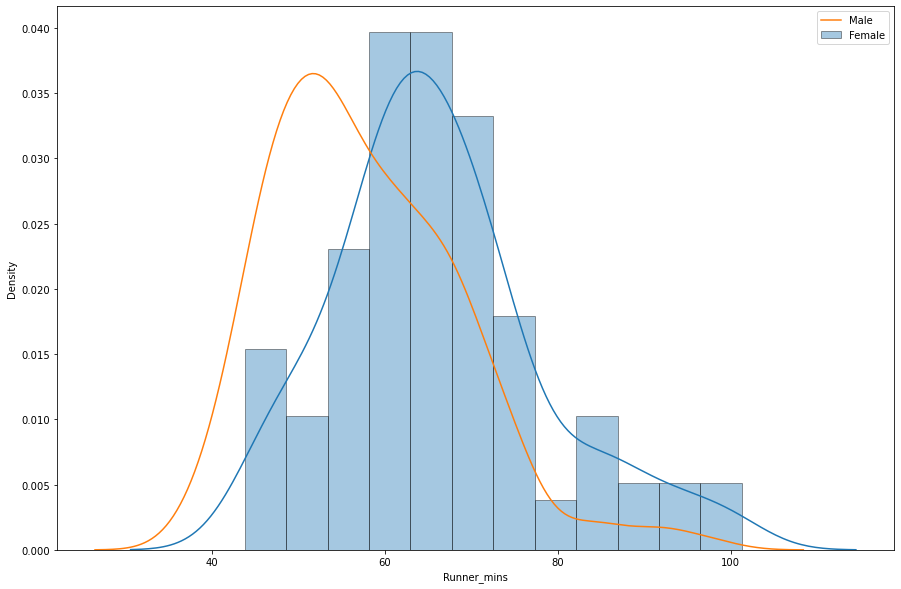

In [84]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [86]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

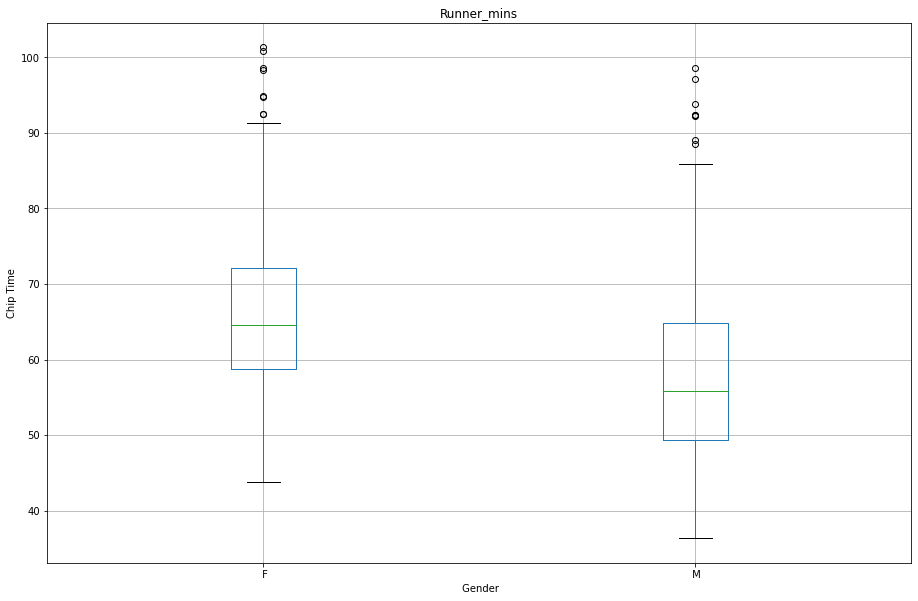

In [87]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")